In [52]:
%pip install -U pip setuptools wheel
%pip install -U spacy
%pip install -U ru2en

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ru2en (from versions: none)
ERROR: No matching distribution found for ru2en


In [3]:
!python -m spacy download ru_core_news_sm

     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/15.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/15.3 MB 1.2 MB/s eta 0:00:13
     ---------------------------------------- 0.2/15.3 MB 1.6 MB/s eta 0:00:10
      --------------------------------------- 0.3/15.3 MB 1.6 MB/s eta 0:00:10
      --------------------------------------- 0.4/15.3 MB 1.8 MB/s eta 0:00:09
     - -------------------------------------- 0.6/15.3 MB 2.4 MB/s eta 0:00:07
     -- ------------------------------------- 0.8/15.3 MB 2.8 MB/s eta 0:00:06
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     -- ------------------------------------- 1.0/15.3 MB 3.2 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/15.3 MB 3.2 MB/s

In [74]:
import spacy
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
nlp = spacy.load('ru_core_news_sm')

In [62]:
Mashenka = open("c:\\Users\\maria\\Downloads\\Nabokov_Mashenka.txt").read() # Машенька (1926)
Camera = open("c:\\Users\\maria\\Downloads\\Camera_Obscura.txt").read() # Камера обскура (1932)
Despair = open("c:\\Users\\maria\\Downloads\\Nabokov_-_Otchayanie.txt").read() # Отчаяние (1934)
Gift = open("c:\\Users\\maria\\Downloads\\Dar.txt").read() # Дар (1938)
Lolita = open("c:\\Users\\maria\\Downloads\\Lolita1.txt").read() # Лолита (1955)
Transparent = open("c:\\Users\\maria\\Downloads\\Prozrachnye_predmety.txt").read() # Прозрачные предметы (1972)

In [72]:
def sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    sentence_word_length = [len(sent.split()) for sent in sentences]
    mean_sentence_len = np.mean(sentence_word_length)
    print('Средняя длина предложения: ', mean_sentence_len)
    return mean_sentence_len

def interrogative_sentence(text):
    interrogative_count = 0
    total_sentences = 0

    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if sent_text.endswith('?'):
            interrogative_count += 1
        total_sentences += 1

    if total_sentences > 0:
        proportion = interrogative_count / total_sentences
    else:
        proportion = 0

    print('Соотношение вопросительных предложений ко всему тексту:', proportion)
    return interrogative_count   
        
def exclamatory_sentence(text):
    exclamatory_count = 0
    total_sentences = 0

    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if sent_text.endswith('!'):
            exclamatory_count += 1
        total_sentences += 1

    if total_sentences > 0:
        proportion = exclamatory_count / total_sentences
    else:
        proportion = 0

    print('Соотношение восклицательных предложений ко всему тексту:', proportion)
    return exclamatory_count

def simple_sentence(text):
    simple_count = 0
    total_sentences = 0
    
    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if len(list(sent)) == 1 and not any([token.dep_ == 'cc' for token in sent]):
            simple_count += 1
        total_sentences += 1
    
    if total_sentences > 0:
        proportion = simple_count / total_sentences
    else:
        proportion = 0
    
    print('Соотношение простых предложений ко всему тексту:', proportion)
    return simple_count

def complex_sentence(text):
    complex_count = 0
    total_sentences = 0
    
    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if len(list(sent)) > 1 and any([token.dep_ == 'cc' for token in sent]):
            complex_count += 1
        total_sentences += 1
    
    if total_sentences > 0:
        proportion = complex_count / total_sentences
    else:
        proportion = 0
    
    print('Соотношение сложноподчиненных предложений ко всему тексту:', proportion)
    return complex_count

def compound_sentence(text):
    compound_count = 0
    total_sentences = 0
    
    doc = nlp(text)
    for sent in doc.sents:
        sent_text = sent.text.strip()
        if len(list(sent)) > 1 and not any([token.dep_ == 'cc' for token in sent]):
            compound_count += 1
        total_sentences += 1
    
    if total_sentences > 0:
        proportion = compound_count / total_sentences
    else:
        proportion = 0
    
    print('Соотношение сложносочиненных предложений ко всему тексту:', proportion)
    return compound_count

def root_words(text):
    doc = nlp(text)
    root = []

    for token in doc:
        if token.dep_ == 'ROOT':
            root.append(token.text)
    root = str(root)
    print(root)
    
    wordcloud = WordCloud().generate(root)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

def nsubj_words(text):
    doc = nlp(text)
    nsubj = []

    for token in doc:
        if token.dep_ == 'nsubj':
            nsubj.append(token.text)
    nsubj = str(nsubj)
    print(nsubj)

    wordcloud = WordCloud().generate(nsubj)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Средняя длина предложения:  15.61111111111111
Средняя длина предложения:  14.72961956521739
Средняя длина предложения:  15.880650994575046
Средняя длина предложения:  21.163606010016693
Средняя длина предложения:  18.979644707623983
Средняя длина предложения:  18.94859437751004


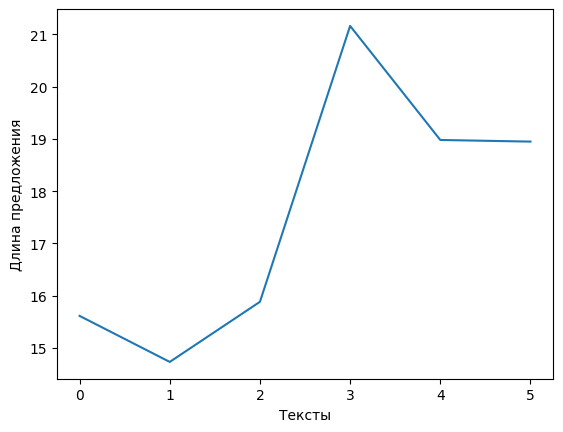

In [36]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
sentence_lengths = []

for text in texts:
    mean_sentence_length = sentence_length(text)
    sentence_lengths.append(mean_sentence_length)
    
plt.plot(sentence_lengths)
plt.xlabel("Тексты")
plt.ylabel("Длина предложения")
plt.show()

Владимир Набоков был более лаконичен в изложении своих мыслей в начале своей карьеры. Начиная с "Дара" среднее количество слов в предложении значительно возросло.

Соотношение вопросительных предложений ко всему тексту: 0.04382929642445214
Соотношение вопросительных предложений ко всему тексту: 0.0195822454308094
Соотношение вопросительных предложений ко всему тексту: 0.03657694962042788
Соотношение вопросительных предложений ко всему тексту: 0.047245530828164906
Соотношение вопросительных предложений ко всему тексту: 0.052779864763335835
Соотношение вопросительных предложений ко всему тексту: 0.04688832054560955


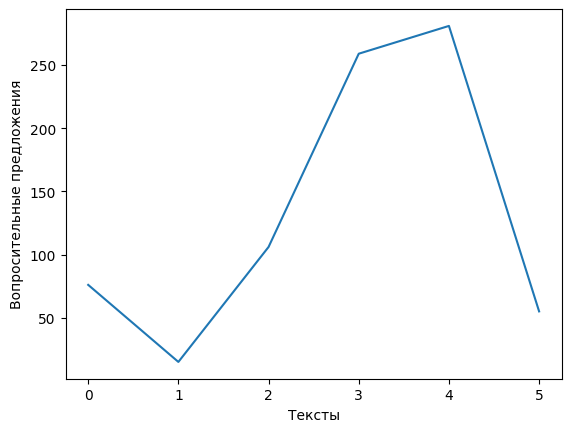

In [47]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
interrogative_sentences = []

for text in texts:
    interrogative_count = interrogative_sentence(text)
    interrogative_sentences.append(interrogative_count)
    
plt.plot(interrogative_sentences)
plt.xlabel("Тексты")
plt.ylabel("Вопросительные предложения")
plt.show()

Увеличение вопрочительных предложений в "Даре" и "Лолите" может говорить о том, что в этих романах большое внимание уделяется диалогом, либо же внутренним размышления персонажей. 

Соотношение восклицательных предложений ко всему тексту: 0.006343713956170703
Соотношение восклицательных предложений ко всему тексту: 0.006527415143603133
Соотношение восклицательных предложений ко всему тексту: 0.023809523809523808
Соотношение восклицательных предложений ко всему тексту: 0.032287486318861726
Соотношение восклицательных предложений ко всему тексту: 0.050713749060856496
Соотношение восклицательных предложений ко всему тексту: 0.03324808184143223


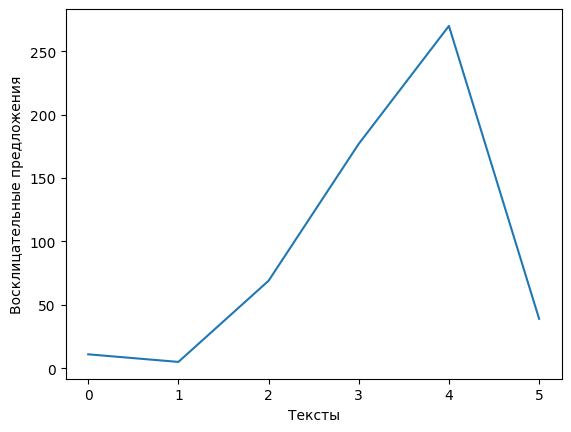

In [45]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
exclamatory_sentences = []

for text in texts:
    exclamatory_count = exclamatory_sentence(text)
    exclamatory_sentences.append(exclamatory_count)
    
plt.plot(exclamatory_sentences)
plt.xlabel("Тексты")
plt.ylabel("Восклицательные предложения")
plt.show()

Тексты Набокова стали более эмоционально окрашенными по мере его становления как писателя. Самым эмоциональным произведением в его карьеры стала "Лолита".

Соотношение простых предложений ко всему тексту: 0.005190311418685121
Соотношение простых предложений ко всему тексту: 0.005221932114882507
Соотношение простых предложений ко всему тексту: 0.0
Соотношение простых предложений ко всему тексту: 0.002918642831083546
Соотношение простых предложений ко всему тексту: 0.0018782870022539444
Соотношение простых предложений ко всему тексту: 0.0034100596760443308


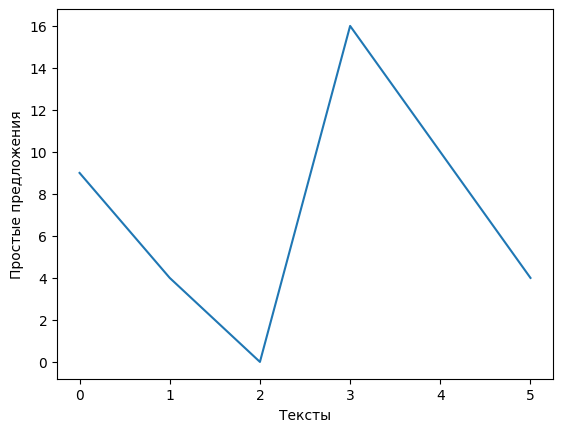

In [64]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
simple_sentences = []

for text in texts:
    simple_count = simple_sentence(text)
    simple_sentences.append(simple_count)
    
plt.plot(simple_sentences)
plt.xlabel("Тексты")
plt.ylabel("Простые предложения")
plt.show()

На протяжении всего своего творческого становления Набоков использовал минимальное количество простых синтаксических конструкций.

Соотношение сложноподчиненных предложений ко всему тексту: 0.461361014994233
Соотношение сложноподчиненных предложений ко всему тексту: 0.4216710182767624
Соотношение сложноподчиненных предложений ко всему тексту: 0.4271911663216011
Соотношение сложноподчиненных предложений ко всему тексту: 0.4903319956220358
Соотношение сложноподчиненных предложений ко всему тексту: 0.45886551465063863
Соотношение сложноподчиненных предложений ко всему тексту: 0.5370843989769821


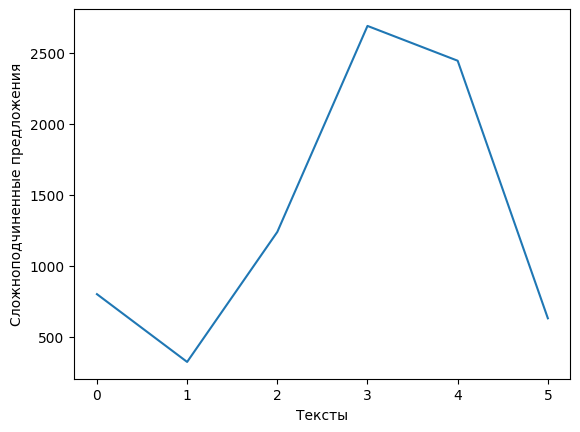

In [60]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
complex_sentences = []

for text in texts:
    complex_count = complex_sentence(text)
    complex_sentences.append(complex_count)
    
plt.plot(complex_sentences)
plt.xlabel("Тексты")
plt.ylabel("Сложноподчиненные предложения")
plt.show()

Во второй половине своего творческого пути Набоков стал использовать сложноподчиненные предложения чаще.

Соотношение сложносочиненных предложений ко всему тексту: 0.5334486735870819
Соотношение сложносочиненных предложений ко всему тексту: 0.5731070496083551
Соотношение сложносочиненных предложений ко всему тексту: 0.5728088336783989
Соотношение сложносочиненных предложений ко всему тексту: 0.5067493615468807
Соотношение сложносочиненных предложений ко всему тексту: 0.5392561983471075
Соотношение сложносочиненных предложений ко всему тексту: 0.4595055413469736


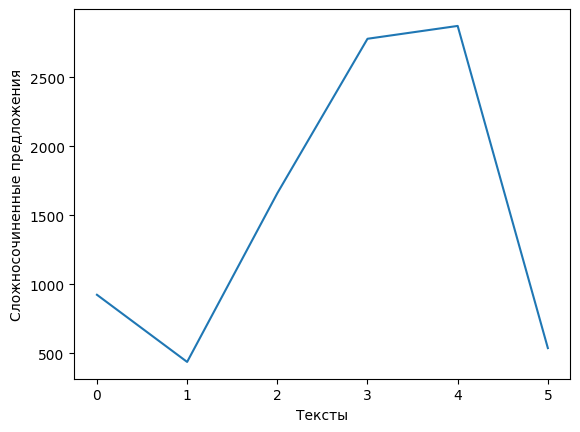

In [61]:
texts = [Mashenka, Camera, Despair, Gift, Lolita, Transparent]
compound_sentences = []

for text in texts:
    compound_count = compound_sentence(text)
    compound_sentences.append(compound_count)
    
plt.plot(compound_sentences)
plt.xlabel("Тексты")
plt.ylabel("Сложносочиненные предложения")
plt.show()

В то время как сложносочиненные предложения стали встречаться немного реже.

['Владимир', 'Посвящаю', 'романы', 'Пушкин', 'подтвердил', 'раздражен', 'Нажимайте', 'поможет', 'вот', 'соединение', 'требует', 'поскромнее', 'позвольте', 'Простите', 'Пора', 'Черт', 'зазвучал', 'прокашлялись', 'Скажите', 'Давно', 'есть', 'Нету', 'курю', 'даром', 'приезжает', 'сказать', 'Да', '-', 'ждать', 'воскресенье', 'какая', 'вздохнул', 'Есть', 'осталось', 'полагаю', 'получил', 'написала', 'Жаль', 'щупаете', 'открываются', 'сказал', 'Бросьте', 'знаю', 'Задумайте', 'Готово', 'всплыл', 'согласитесь', 'придется', 'думаете', 'знали', 'тонкий', 'ним--', 'говорил', 'наступила', 'символ', 'спросил', 'остановке', 'ожиданьи', 'обедом', 'спорил', 'обедали', 'Лев', 'Нет', 'городом', 'должно', 'пропал', 'обожает', 'сказала', 'ответил', 'уезжаете', 'кивнул', 'Помолчит', 'Прошло', 'усмехнулся', 'вспыхнула', 'заморгал', 'старом', 'растрепались', 'зацепился', 'заулыбался', 'думал', 'Пожалуйте', 'вытолкнул', 'бывал', 'повторял', 'русский', 'Неприятно', 'суживалась', 'бокам', 'жил', 'жили', 'конце'

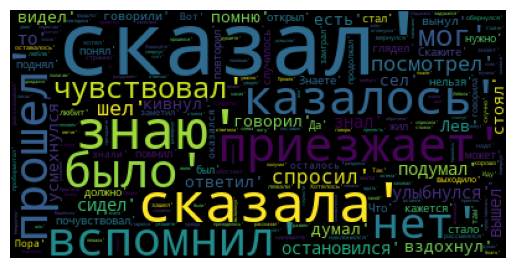

['размножилось', 'е', 'лет', 'писк', 'прим.', 'Рассказывают', 'завтракал', 'коснулся', 'выразил', 'Знаете', 'Придумайте', 'Удалось', 'знаю', 'Бог', 'пищат', 'вспомнил', 'привлекло', 'началось', 'Чипи', 'валяются', 'скоро', 'стал', 'влюблен', 'рассказывал', 'пришлось', 'написал', 'приобрела', 'держала', 'предъявил', 'важно', 'любит', 'что', 'нет', 'живет', 'выиграет', 'дело', 'следствием', 'понимала', 'изучил', 'проникся', 'Что', 'быстро', 'начал', 'подумал', 'происходит', 'потому', 'подумал', 'мысль', 'Нельзя', 'несчастен', 'была', 'была', 'дама', 'Хотите', 'надо', 'возвращаясь', 'романами', 'женился', 'женился', 'милое', 'повенчались', 'каштаны', 'умел', 'был', 'ласкова', 'забеременела', 'испытывал', 'рассматривала', 'увезли', 'рожала', 'ходил', 'вышел', 'появился', 'ринулся', 'Оказалось', 'красненькая', 'обтянулась', 'говорила', 'оставался', 'дивился', 'Были', 'почувствовал', 'заметил', 'бессмысленно', 'горела', 'взглянул', 'относился', 'скользнул', 'заметил', 'взглянул', 'смешалась'

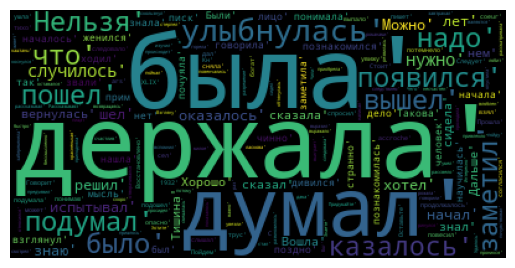

['увeрен', 'обратил', 'глупо', 'обязан', 'выдумка', 'Долой', 'знаю', 'догнал', 'смeю', 'воет', 'громоздкий', 'бeгу', 'нeмец', 'рода', 'полулежала', 'интернировали', 'прочел', 'застрял', 'проживал', 'мая', 'перевалив', 'отступление', 'дочь', 'мог', 'говорю', 'шоколадное', 'вещь', 'Есть', 'понимаю', 'дрожат', 'невозможно', 'чешется', 'Надо', 'нельзя', 'Спокойствие', 'Шоколад', 'изображена', 'предлагали', 'отправился', 'сказали', 'Нахожу', 'стоило', 'муки', 'застал', 'нечего', 'день', 'катались', 'глядeл', 'Пошел', 'зашагал', 'поднимался', 'Рeшил', 'оказалось', 'вилась', 'дойду', 'удовлетворяла', 'некуда', 'оказались', 'увидeл', 'Рeшил', 'вдали', 'покинул', 'телeга', 'глядeл', 'лежал', 'прошел', 'штанах', 'себe', 'соваться', 'подошел', 'играй', 'лучше', 'минута', 'усомнился', 'может', 'ошеломила', 'глядeл', 'смотрeл', 'вызывало', 'добрался', 'Вернемся', 'блуждаю', 'думал', 'то', 'пуст', 'витала', 'сказал', 'преувеличивал', 'показаться', 'успокойтесь', 'Здоровый', 'Повторяю', 'смотрeл', 'п

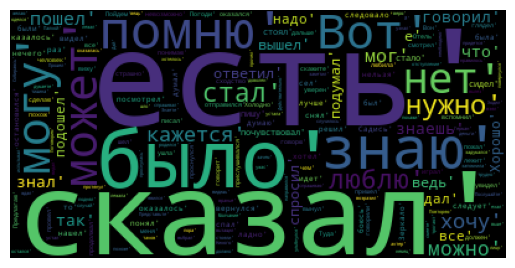

['написана', 'напечатал', 'появился', 'представить', 'жил', 'означает', 'Федор', 'ухаживал', 'Кончееве', 'было', 'просвечивает', 'отражает', 'усугубляется', 'кажется', 'признавала', 'существует', 'Нет', 'Нет', 'вымирает', 'могу', 'была', 'Зина', 'сосредоточен', 'развивается', 'оборачивается', 'спираль', 'сходятся', 'последует', 'делает', 'закончил', 'перевел', 'проредактировал', 'отвечаю', 'выдуман', 'подражает', 'Перевели', 'Глава', 'цветок', 'животное', 'птица', 'отечество', 'неизбежна', 'П.', 'остановился', 'виднелась', 'стояли', 'старик', 'одета', 'собирались', 'начать', 'выбежал', 'знал', 'зрачку', 'искал', 'было', 'разобщены', 'Боже', 'ресницы', 'благородство', 'человеколюбие', 'подражание', 'определялся', 'держали', 'добирать', 'повернул', 'пошел', 'делаю', 'Дайте', 'воротился', 'было', 'лежало', 'встретил', 'сказала', 'было', 'комната', 'стоял', 'насупротив', 'чернелась', 'видом', 'Прозревши', 'трудно', 'придется', 'сыпать', 'пришла', 'сказал', 'Выехали', 'хочу', 'знаете', 'сло

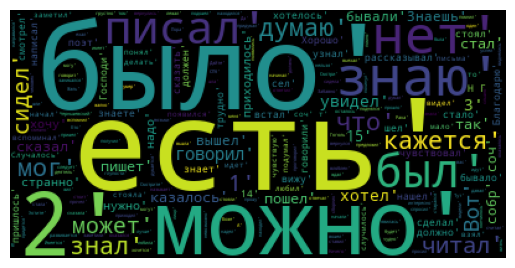

['Владимир', 'Лолита', 'Грех', 'та', 'Ло', 'Ли', 'Та', 'Ло', 'Лола', 'Долли', 'Долорес', 'всегда', 'были', '-', 'скажу', 'княжестве', 'лето', 'Можете', 'присяжные', 'представляет', 'Полюбуйтесь', 'родился', 'отличался', 'раздам', 'принадлежала', 'торговали', 'женился', 'садится', 'замужем', 'слышал', 'привязан', 'хотелось', 'тети', 'писала', 'Была', 'Говорила', 'проводил', 'рос', 'вращалась', 'любили', 'надо', 'могли', 'брал', 'учился', 'лет', 'было', 'дал', '3', 'помню', 'есть', 'Позвольте', 'щепетильны', 'нанимали', 'ненавидел', 'разговаривали', 'поднимала', 'настроены', 'возбуждали', 'мечтала', 'мечтал', 'оказались', 'единственное', 'валялись', 'сокровищ', 'вышла', 'вышел', 'снята', 'удалились', 'стоял', 'перелистываю', 'признаком', 'поддаюсь', 'уверен', 'Знаю', 'сливалось', 'чувствовал', 'бывали', 'сличали', 'Находили', 'впорхнула', 'O', 'приберег', 'удалось', 'нашли', 'виднелись', 'вздрагивала', 'горела', 'выделялось', 'сжаты', 'тянулась', 'приближался', 'старалась', 'Помню', 'зас

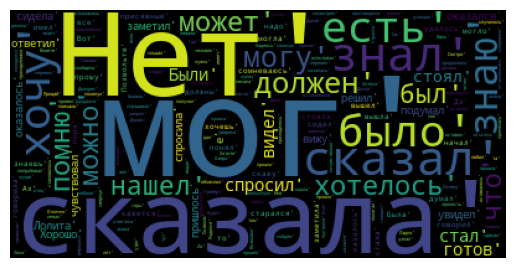

['персонаж', 'Привет', 'слышит', 'казалось', 'чувствовала', 'забавно', 'имеет', 'Привет', 'чем', 'пристаем', 'Привет', 'сосредоточены', 'должны', 'вещи', 'трудно', 'объясню', 'покрывает', 'обнаружит', 'вернемся', 'выдвигал', 'выставляло', 'украшен', 'сбежал', 'расплатился', 'неопрятным', 'спросил', 'сказала', 'показана', 'Имелась', 'умер', 'нет', 'отправила', 'вспомнил', 'хотел', 'провожал', 'выходила', 'принес', 'знал', 'велика', 'вспомнил', 'кровать', 'имелось', 'отказывался', 'взбунтовался', 'притворил', 'Позвольте', 'заметил', 'попытался', 'осмотрен', 'красавец', 'столяром', 'вернулись', 'износился', 'потемнело', 'потрудились', 'стачивался', 'видим', 'помещают', 'тянется', 'режут', 'варят', 'постараемся', 'дерево', 'сосна', 'валят', 'Нужен', 'слышим', 'доска', 'различаем', 'Различаем', 'разворачивается', 'ускользает', 'дано', 'То', 'состоялась', 'посетил', 'взбирались', 'запомнил', 'запомнилось', 'снесены', 'Спал', 'есть', 'привык', 'состарился', 'можем', 'были', 'унаследовал', 'ср

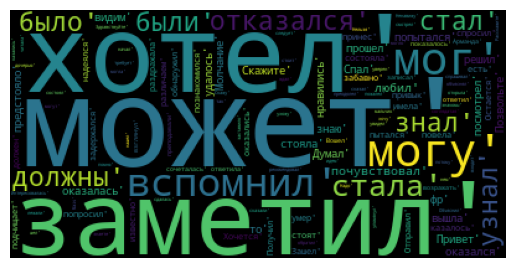

In [71]:
root_words(Mashenka)
root_words(Camera)
root_words(Despair)
root_words(Gift)
root_words(Lolita)
root_words(Transparent)

Во многих произведениях не так много слов, которые указывают на прямую речь,
например, "сказал". Больше внимания уделяется словам, указывающим на повествование, или рассуждение, например, "заметил", "было", "может".

['Машенька', 'Воспомня', 'имя', 'Можно,--', 'Ганин', 'они', 'Я', 'имя', 'я', 'кнопку,--', 'Ганин', 'Лев', 'Оно', 'имя', 'я', 'Ганин', 'которая', 'вы', 'мы', 'Сядем', '-', 'ка', 'подождем,--', 'я', 'мы', 'вы', 'кашля', 'вы', 'Спички', 'пансион', 'счастье', 'жена', 'Нынче', 'Тьма', 'Ганин', 'который', 'Алферов', 'что', '-', 'то', 'Значит,--', 'дней', 'Я', 'она', 'я', 'она', 'темень', 'вы', 'оконца', 'Я', 'Ганин', 'Я', 'Ганин', 'голос', 'мы', 'вы', 'нечто', 'фирма', 'мы', 'помещеньице', 'сказать,--', 'пол', 'колодец', 'я', 'мы', 'тьма', 'Ганин', 'писатель', 'Подтягин', 'Вы', 'весна', 'Голос', 'Алферов', 'жена', 'я', 'Она', 'хозяйка', 'комната', 'Ганин', 'Ганин', 'Алферов', 'минут', '-', 'то', 'это', 'лучше,--', 'Ганин', 'клетка', 'Он', 'волосы', 'что', '-', 'то', 'он', 'Лифт', 'Чудеса,--', 'Алферов', 'Я', 'кто', '-', 'то', 'Ганин', 'он', 'Чудеса,--', 'знаете,--', 'то', 'день', '-', 'часть', 'поезда', 'дом', 'зеркало', 'баул', 'комнаты', 'это', 'дверь', 'Алферов', 'поэт', 'столовая', 'вазы

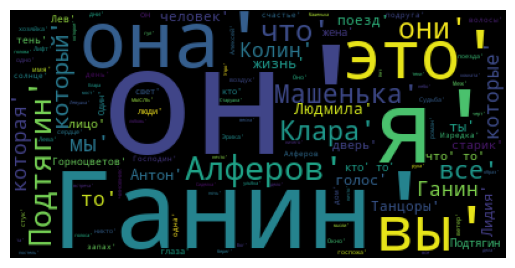

['Владимир', 'существо', 'существо', 'открытки', 'cheep', 'ред', 'Художник', 'Разговор', 'Физиолог', 'наука', 'которые', 'он', 'вы', '-', 'этак', 'я', 'что', 'Горн', 'они', 'издательство', 'свинка', 'выражение', 'манера', 'главное', 'которая', 'Чипи', 'Йорик', 'сколь', 'Чипи', 'намеки', 'Чипи', 'д.', 'спрос', 'мир', 'Физиолог', 'он', 'никто', 'он', 'художник', 'Фирма', 'Дорианна', 'Горн', 'Чипи', 'нуждавшаяся', 'Он', 'Кречмар', 'Ты', 'Макс', 'Он', 'он', 'Аннелиза', 'привычка', 'Муж', 'она', 'он', 'ожидание', 'жена', 'Кречмар', 'ты', 'что', 'он', 'жена', 'я', 'дитя', 'она', 'которая', 'Макс', 'Кречмар', 'дело', 'нечто', 'это', 'Кречмар', 'он', 'Это', 'она', 'Кречмар', 'он', 'это', 'связь', 'история', 'которая', 'которая', 'челюсть', 'я', 'Кречмар', 'женщина', 'которая', 'она', 'сотни', 'он', 'которые', 'Он', 'это', 'кожа', 'отпечатки', 'Он', 'поездка', 'Что', '-', 'то', 'легкое', 'она', 'Они', 'Один', 'шрам', 'Она', 'изредка', 'женщин', 'она', 'который', 'никто', 'Он', 'она', 'венеры', 

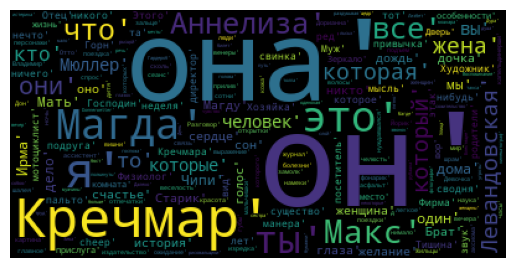

['я', 'я', 'я', 'я', 'читатель', 'ничего', 'Это', 'я', 'я', 'который', 'лeвша', 'философия', 'Я', 'Смeшон', 'который', 'Он', 'он', 'он', 'Образ', 'Я', 'отец', 'она', 'я', 'я', 'я', 'я', 'она', 'Я', 'я', 'я', 'я', 'Дeло', 'Шоколад', 'барышни', 'которые', 'руки', 'мнe', 'сердце', 'Мы', 'я', 'я', 'это', 'мнe', 'поскорeе', 'кое', 'контора', 'я', 'он', 'перерыв', 'я', 'ощущение', 'Мнe', 'старое', 'Нeт', 'это', 'это', 'я', 'вeтер', 'солнце', 'оно', 'гдe', 'инвалиды', 'Я', 'простор', 'солдат', 'я', 'холм', 'Великолeпие', 'тропинка', 'ее', 'растительность', 'кусты', 'корни', 'я', 'домики', 'я', 'Я', 'мeста', 'автомобиль', 'я', 'Я', 'что', '-', 'то', 'Он', 'Глупости', 'я', 'он', 'он', 'Чего', 'я', 'Оркестр', 'Я', 'мнe', 'я', 'он', 'я', 'его', 'Я', 'все', 'Я', 'Чудо', 'я', 'настроение', 'я', 'я', 'я', 'я', 'То', '-', 'что', 'Я', 'Дымка', 'я', 'дымка', 'что', 'латыш', 'я', 'задумчивость', 'я', 'он', 'я', 'разум', 'игры', 'то', 'что', 'я', 'я', 'я', 'вдохновение', 'я', 'минута', 'Я', 'чудо', 'расс

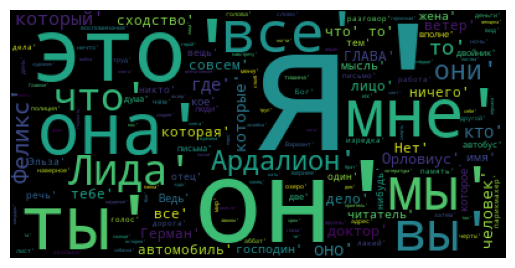

['Владимир', 'журнал', 'Васильев', 'пример', 'жизнь', 'она', 'текст', 'Дар', 'Я', 'обстоятельство', 'интересы', 'читатель', 'Я', 'отец', 'я', 'я', 'я', 'я', 'хватки', 'которая', 'я', 'История', 'Отношение', 'презрение', 'эмигранты', 'это', 'роман', 'которая', 'отлив', 'я', 'интеллигенция', 'которая', 'мира', 'больше', 'Владислава', 'интеллигенция', 'которые', 'мир', 'я', 'Она', 'героиня', 'он', 'глава', 'стержень', 'Книга', 'темы', 'образ', 'Федор', 'Любопытно', 'воображение', 'я', 'Участие', 'сын', 'требования', 'Михаил', 'я', 'Я', 'Эпиграф', 'стихотворение', 'Владимир', 'Роман', 'Роза', 'Олень', 'Воробей', 'Россия', 'Смерть', 'Учебник', 'критик', 'романы', 'авторы', 'фургон', 'звезда', 'название', 'я', 'особы', 'Мужчина', 'он', 'холодный', 'ветер', 'их', 'молодцов', 'кто', '-', 'то', 'это', 'Сам', 'он', 'он', 'он', 'невдалеке', 'улица', 'роста', 'она', 'он', 'что', 'ничего', 'свет', 'которая', 'все', 'цвет', 'бремя', 'ничего', 'он', 'закон', 'роение', 'они', 'зеленная', 'одна', 'они'

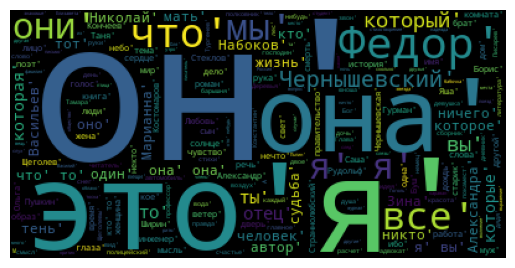

['Ло', '-', 'ли', '-', 'кончик', 'Она', 'Она', 'Она', 'Она', 'она', 'предшественницы', '-', 'то', 'Лолиты', 'я', 'это', 'сколько', 'Экспонат', 'серафимы', '-', 'худо', 'серафимы', 'Я', 'отец', 'гражданин', 'Я', 'гостиница', 'отец', 'он', 'Обстоятельства', 'ничего', 'вы', 'солнце', 'остатки', 'которые', 'теплынь', 'сестра', 'я', 'что', 'он', 'все', 'погода', 'лазоревые', 'Она', 'поэтически', 'оно', 'муж', 'Я', 'гостиница', 'все', 'американки', 'княгини', 'Он', 'я', 'слуги', 'которые', 'Я', 'я', 'переживания', 'он', 'я', 'отец', 'которые', 'зто', 'отец', 'Аннабелла', 'я', 'Лолиту', 'подхода', 'Аннабелла', 'я', 'это', 'девочка', 'родители', 'Они', 'я', 'мы', 'Она', 'я', 'Она', 'я', 'мы', 'я', 'стремление', 'каждый', 'мы', 'дети', 'народу', 'мы', 'рука', 'колено', 'вал', 'соприкосновения', 'что', 'мы', 'фотография', 'который', 'Аннабелла', 'она', 'я', 'шанса', 'ничто', 'мы', 'мы', 'очки', 'Я', 'дед', 'она', 'трещина', 'увлечение', 'я', 'путь', 'Я', 'Лолита', 'то', 'смерть', 'Духовное', 'ка

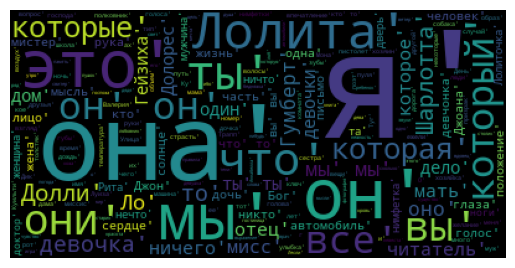

['Владимир', 'который', 'будущее', 'прошлое', 'Душа', 'грядущее', 'настоящее', 'будущее', 'дело', 'мы', 'внимание', 'Новички', 'прошлое', 'Предметы', 'вы', 'новички', 'истории', 'слой', 'тот', 'кто', 'чудотворец', 'мы', '2', 'персонаж', 'некоторые', 'голова', 'дверцы', 'здание', 'ставни', 'которые', 'Швейцар', 'шофер', 'Персон', 'холл', 'он', 'все', 'Крониг', 'он', 'Администраторша', 'месье', 'подпись', 'немецкая', 'Английская', 'гласила', 'Он', 'девушка', 'никого', 'кто', 'она', 'он', 'она', 'он', 'номер', 'она', 'солнце', 'вид', 'Он', 'правила', 'директор', 'Крониг', 'это', 'помощник', 'зеркало', 'которые', 'сутулость', 'Комната', 'экскаваторы', 'швейцар', 'Персон', 'один', 'Он', 'гостиница', 'Belle', 'комната', 'Он', 'комната', 'он', 'биде', 'что', 'ванны', 'Стульчак', 'Кран', 'вы', 'тайна', 'Хью', 'она', 'Хью', 'ящик', 'кто', 'никто', 'Хью', 'тот', 'То', 'мы', 'карандаш', 'дерево', 'блеск', 'Нож', 'мы', 'разброс', 'вещи', 'он', 'грифель', 'мы', 'графит', 'зерна', 'Он', 'мы', 'снимо

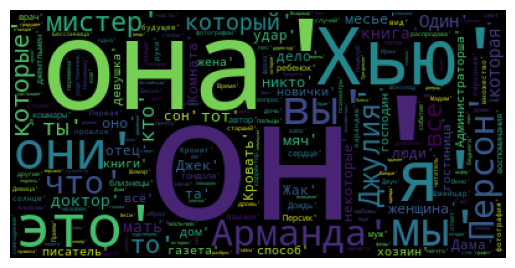

In [73]:
nsubj_words(Mashenka)
nsubj_words(Camera)
nsubj_words(Despair)
nsubj_words(Gift)
nsubj_words(Lolita)
nsubj_words(Transparent)

В основном, подлежающими в предложениях выступают имена сообственные и личные местоимения. В случаях, когда повествование ведется от первого лица, чаще встречаются личные местоимения.